In [49]:
import pandas as pd

url = 'https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/buildings_all_stats_mapped_%E0%B9%83%E0%B8%8A%E0%B9%89%E0%B8%AD%E0%B8%B1%E0%B8%99%E0%B8%99%E0%B8%B5%E0%B9%89.csv'
excel_df = pd.read_csv(url)

display(excel_df.head())

,id,DISTRICT,SUB_DISTRI,COUNT_REQ,floors,UP_DMG,WALL_DMG,FLOOR_DMG,PILLAR_DMG,STRUCTURE_,...,SoftClay_m,WaterConte,LiquidLimi,Plasticity,Total_Unit,Score_Rang,Zoning,total_dmg_score,total_dmg_class,total_dmg_class_id
0,137963924,สาทร,ทุ่งวัดดอน,13,28.0,2,4,1,3,1,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,1.000000,วิกฤต,5
1,176332744,ปทุมวัน,ลุมพินี,1,33.0,0,0,0,0,0,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.000000,ไม่มีความเสียหาย,0
2,1310886070,คลองเตย,คลองเตย,1,4.0,0,0,0,0,1,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.202734,น้อยมาก,1
3,377292915,ยานนาวา,ช่องนนทรี,8,NaN,1,1,0,0,0,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.292962,น้อย,2
4,333233945,บางพลัด,บางยี่ขัน,3,NaN,0,0,0,0,1,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.202734,น้อยมาก,1


In [50]:
# Install a Thai font
!sudo apt-get update
!sudo apt-get install fonts-thai-tlwg -y

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [51]:
no_damage_count = excel_df[excel_df['total_dmg_score'] == 0]
damage_count = excel_df[excel_df['total_dmg_score'] != 0]

In [52]:

sum_count_no_damage = no_damage_count['COUNT_REQ'].sum()
sum_count_damaged = damage_count['COUNT_REQ'].sum()

In [53]:
total_count_req = sum_count_no_damage + sum_count_damaged
prop_count_no_damage = sum_count_no_damage / total_count_req
prop_count_damaged = sum_count_damaged / total_count_req

ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว


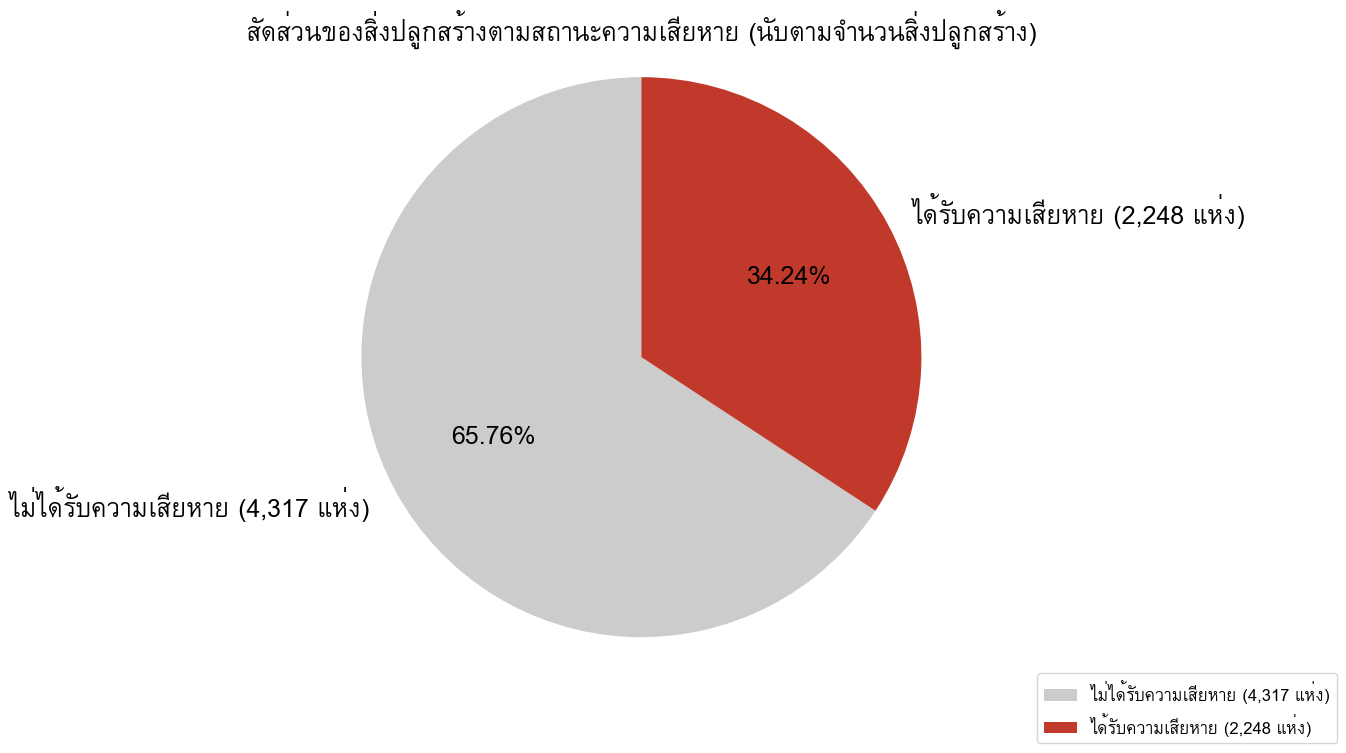

In [106]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add the specific font file to the font manager
garuda_font_path = '/usr/share/fonts/truetype/tlwg/Garuda.ttf'
try:
    fm.fontManager.addfont(garuda_font_path)
    # Set the default font family for the plot
    plt.rcParams['font.family'] = 'Garuda'
    plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS']
    print(f"ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว")
except FileNotFoundError:
    print(f"Error: ไม่พบไฟล์ฟอนต์ที่ตำแหน่ง {garuda_font_path}. โปรดตรวจสอบ path ของฟอนต์ที่ติดตั้ง.")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์: {e}")

no_damage_count_id = excel_df[excel_df['total_dmg_score'] == 0]['id'].count()
damage_count_id = excel_df[excel_df['total_dmg_score'] != 0]['id'].count()


total_count_id = no_damage_count_id + damage_count_id
prop_count_no_damage_id = no_damage_count_id / total_count_id
prop_count_damaged_id = damage_count_id / total_count_id

sizes = [prop_count_no_damage_id, prop_count_damaged_id]
labels = [f"ไม่ได้รับความเสียหาย ({no_damage_count_id:,} แห่ง)", f"ได้รับความเสียหาย ({damage_count_id:,} แห่ง)"]


colors = ['#cccccc', '#c0392b'] # Light grey for no damage, strong red for damage

plt.figure(figsize=(10, 8))

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'fontsize': 18})
plt.title("สัดส่วนของสิ่งปลูกสร้างตามสถานะความเสียหาย (นับตามจำนวนสิ่งปลูกสร้าง)", fontsize=18)
plt.axis('equal')


plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0), fontsize=12)

plt.show()

ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว


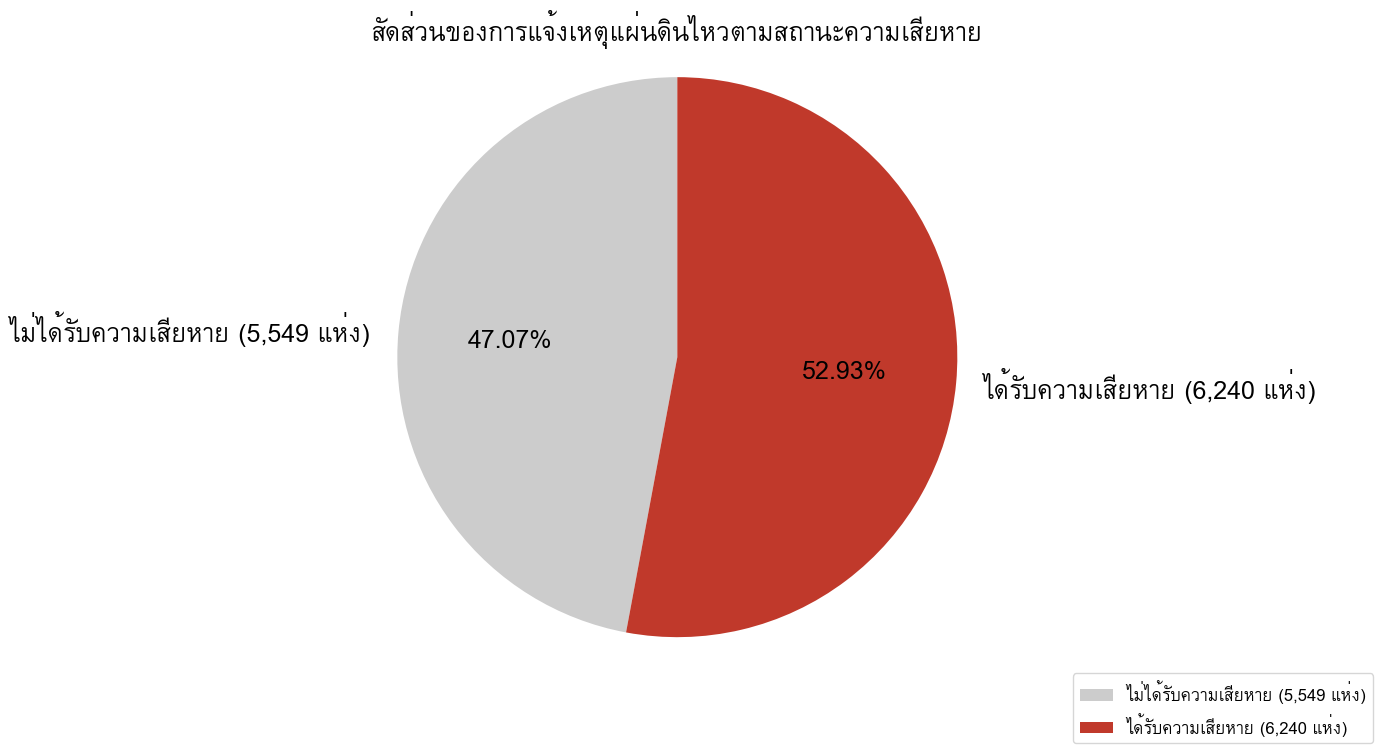

In [103]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


garuda_font_path = '/usr/share/fonts/truetype/tlwg/Garuda.ttf'
try:
    fm.fontManager.addfont(garuda_font_path)
    # Set the default font family for the plot
    plt.rcParams['font.family'] = 'Garuda'
    plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS'] # Add fallback fonts
    print(f"ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว")
except FileNotFoundError:
    print(f"Error: ไม่พบไฟล์ฟอนต์ที่ตำแหน่ง {garuda_font_path}. โปรดตรวจสอบ path ของฟอนต์ที่ติดตั้ง.")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์: {e}")

sizes = [prop_count_no_damage, prop_count_damaged]
labels = [f"ไม่ได้รับความเสียหาย ({sum_count_no_damage:,} แห่ง)", f"ได้รับความเสียหาย ({sum_count_damaged:,} แห่ง)"]


colors = ['#cccccc', '#c0392b'] # Light grey for no damage, strong red for damage

plt.figure(figsize=(10, 8))

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'fontsize': 18})
plt.title("สัดส่วนของการแจ้งเหตุแผ่นดินไหวตามสถานะความเสียหาย", fontsize=18)
plt.axis('equal')


plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0), fontsize=12)

plt.show()

In [56]:
district_stats = excel_df.groupby('DISTRICT')[['total_dmg_score', 'COUNT_REQ']].sum().reset_index()
display(district_stats.head())

,DISTRICT,total_dmg_score,COUNT_REQ
0,คลองสาน,14.107580,283
1,คลองสามวา,8.731174,89
2,คลองเตย,26.569863,512
3,คันนายาว,2.694282,60
4,จตุจักร,50.132402,1177


ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว


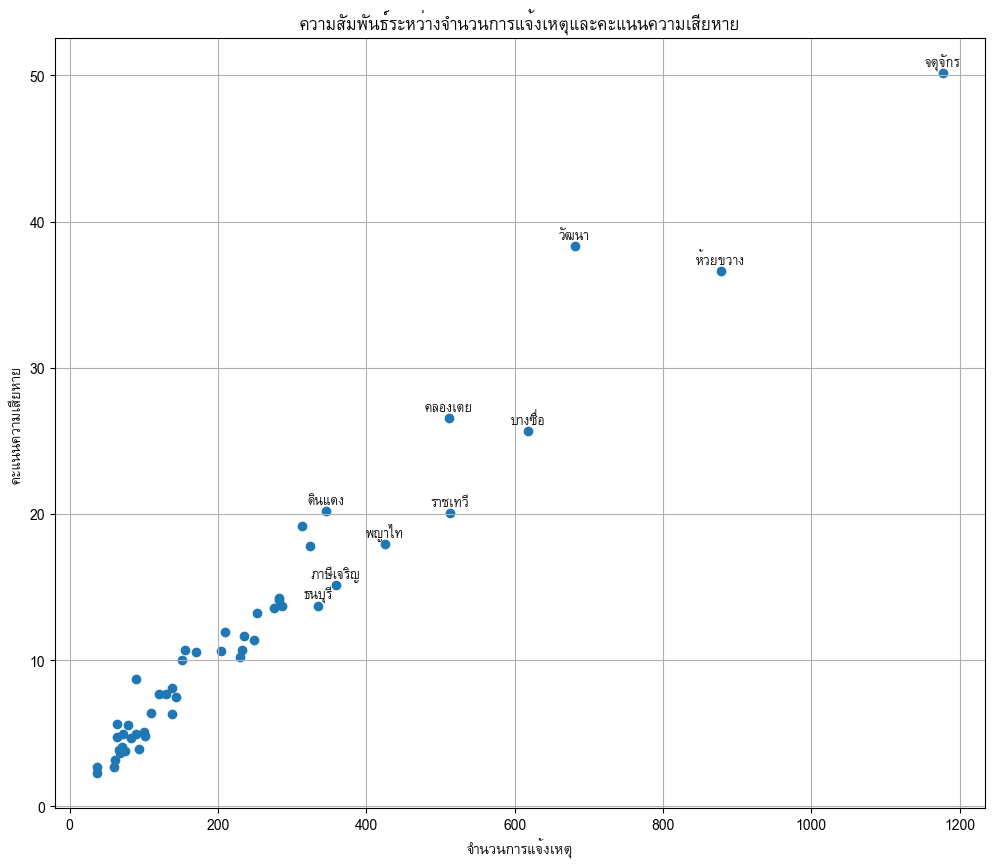

In [86]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

garuda_font_path = '/usr/share/fonts/truetype/tlwg/Garuda.ttf'
try:
    fm.fontManager.addfont(garuda_font_path)
    plt.rcParams['font.family'] = 'Garuda'
    plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS']
    print(f"ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว")
except FileNotFoundError:
    print(f"Error: ไม่พบไฟล์ฟอนต์ที่ตำแหน่ง {garuda_font_path}. โปรดตรวจสอบ path ของฟอนต์ที่ติดตั้ง.")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์: {e}")



# Sort by COUNT_REQ to identify the top 10 districts
district_stats_sorted_requests = district_stats.sort_values(by='COUNT_REQ', ascending=False)
top_10_districts = district_stats_sorted_requests.head(10)


plt.figure(figsize=(12, 10))
plt.scatter(district_stats['COUNT_REQ'], district_stats['total_dmg_score'])

plt.xlabel('จำนวนการแจ้งเหตุ')
plt.ylabel('คะแนนความเสียหาย')
plt.title('ความสัมพันธ์ระหว่างจำนวนการแจ้งเหตุและคะแนนความเสียหาย')

# Add district names as annotations for ONLY the top 10 districts
for i, row in top_10_districts.iterrows():
    plt.annotate(row['DISTRICT'], (row['COUNT_REQ'], row['total_dmg_score']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.grid(True)
plt.show()

In [59]:
damaged_buildings_df = excel_df[excel_df['total_dmg_score'] > 0].copy()
display(damaged_buildings_df.head())

,id,DISTRICT,SUB_DISTRI,COUNT_REQ,floors,UP_DMG,WALL_DMG,FLOOR_DMG,PILLAR_DMG,STRUCTURE_,...,SoftClay_m,WaterConte,LiquidLimi,Plasticity,Total_Unit,Score_Rang,Zoning,total_dmg_score,total_dmg_class,total_dmg_class_id
0,137963924,สาทร,ทุ่งวัดดอน,13,28.0,2,4,1,3,1,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,1.000000,วิกฤต,5
2,1310886070,คลองเตย,คลองเตย,1,4.0,0,0,0,0,1,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.202734,น้อยมาก,1
3,377292915,ยานนาวา,ช่องนนทรี,8,NaN,1,1,0,0,0,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.292962,น้อย,2
4,333233945,บางพลัด,บางยี่ขัน,3,NaN,0,0,0,0,1,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.202734,น้อยมาก,1
5,1250752795,จตุจักร,จอมพล,41,41.0,4,5,2,0,2,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.792752,วิกฤต,5


In [89]:
damage_class_counts = damaged_buildings_df.groupby('total_dmg_class')['id'].count().reset_index()
damage_class_counts = damage_class_counts.rename(columns={'id': 'count'})
display(damage_class_counts)

,total_dmg_class,count
0,น้อย,663
1,น้อยมาก,1029
2,ปานกลาง,281
3,รุนแรง,179
4,วิกฤต,96


In [90]:
total_damaged_buildings_count = damage_class_counts['count'].sum()
damage_class_counts['proportion'] = damage_class_counts['count'] / total_damaged_buildings_count
display(damage_class_counts)

,total_dmg_class,count,proportion
0,น้อย,663,0.294929
1,น้อยมาก,1029,0.457740
2,ปานกลาง,281,0.125000
3,รุนแรง,179,0.079626
4,วิกฤต,96,0.042705


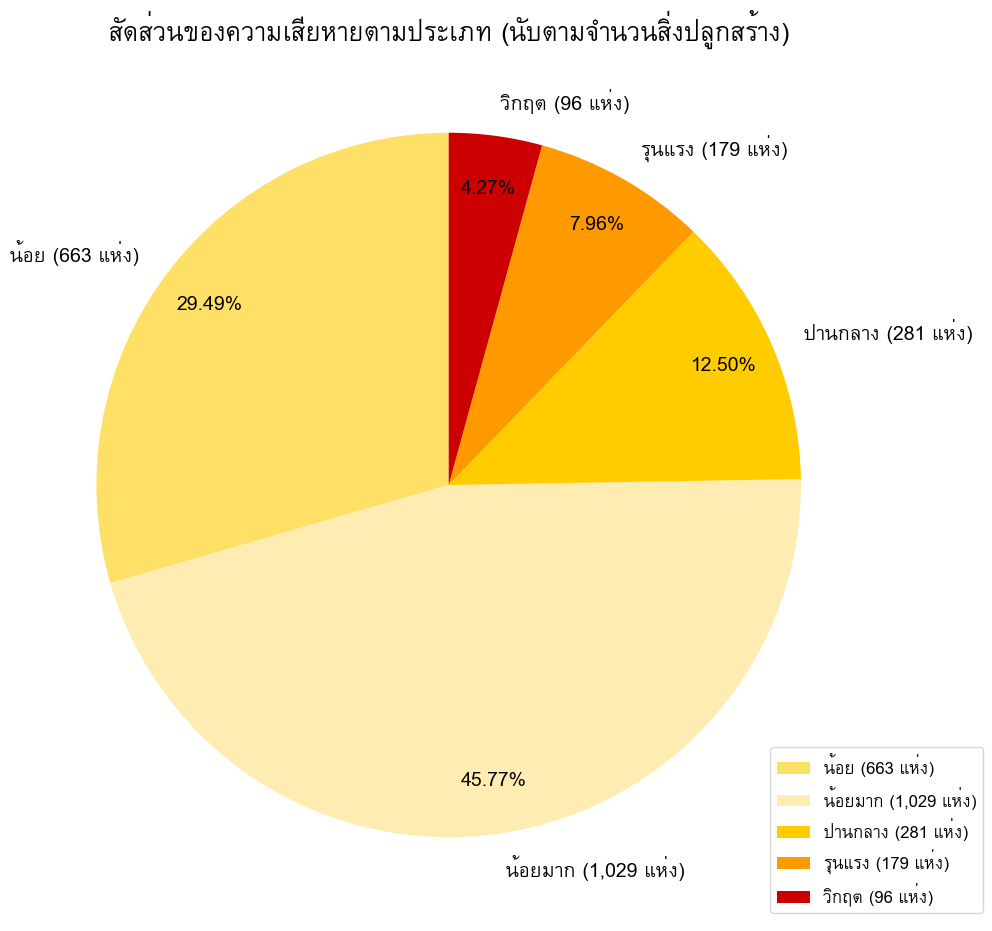

In [91]:
sizes = damage_class_counts['proportion']
labels = [f"{row['total_dmg_class']} ({row['count']:,} แห่ง)" for index, row in damage_class_counts.iterrows()]

colors = ['#ffe066', '#ffecb3', '#ffcc00', '#ff9900', '#cc0000'] # Example colors: Light yellow, lighter yellow, yellow, orange, red

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'fontsize': 14}, pctdistance=0.85) # Reduced fontsize and added pctdistance

plt.axis('equal')
plt.title('สัดส่วนของความเสียหายตามประเภท (นับตามจำนวนสิ่งปลูกสร้าง)', fontsize=18)
plt.legend(labels, loc='lower right', bbox_to_anchor=(1.2, 0), fontsize=12)
plt.subplots_adjust(top=1.2)

plt.show()

In [63]:
district_damage_counts = damaged_buildings_df.groupby(['DISTRICT', 'total_dmg_class'])['id'].count().reset_index()
district_damage_counts = district_damage_counts.rename(columns={'id': 'building_count'})
display(district_damage_counts.head())

,DISTRICT,total_dmg_class,building_count
0,คลองสาน,น้อย,13
1,คลองสาน,น้อยมาก,16
2,คลองสาน,ปานกลาง,5
3,คลองสาน,รุนแรง,8
4,คลองสาน,วิกฤต,3


In [92]:
district_damage_pivot = district_damage_counts.pivot(index='DISTRICT', columns='total_dmg_class', values='building_count').fillna(0)
district_damage_pivot['total_district_buildings'] = district_damage_pivot.sum(axis=1)
district_damage_proportion = district_damage_pivot.div(district_damage_pivot['total_district_buildings'], axis=0)
district_damage_proportion = district_damage_proportion.drop(columns=['total_district_buildings'])

display(district_damage_proportion.head())

total_dmg_class,น้อย,น้อยมาก,ปานกลาง,รุนแรง,วิกฤต
DISTRICT,,,,,
คลองสาน,0.288889,0.355556,0.111111,0.177778,0.066667
คลองสามวา,0.314286,0.428571,0.171429,0.057143,0.028571
คลองเตย,0.208333,0.500000,0.135417,0.114583,0.041667
คันนายาว,0.307692,0.615385,0.076923,0.000000,0.000000
จตุจักร,0.279570,0.483871,0.118280,0.053763,0.064516


ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว


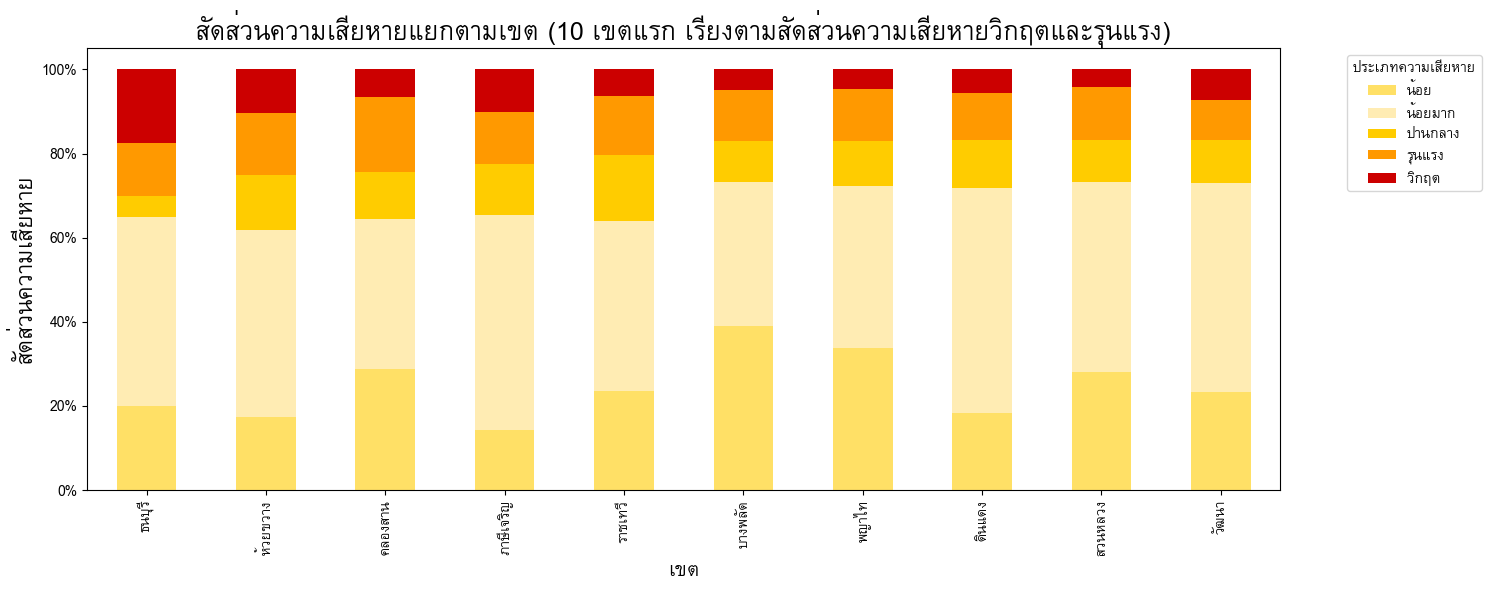

In [93]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick

garuda_font_path = '/usr/share/fonts/truetype/tlwg/Garuda.ttf'
try:
    fm.fontManager.addfont(garuda_font_path)
    plt.rcParams['font.family'] = 'Garuda'
    plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS']
    print(f"ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว")
except FileNotFoundError:
    print(f"Error: ไม่พบไฟล์ฟอนต์ที่ตำแหน่ง {garuda_font_path}. โปรดตรวจสอบ path ของฟอนต์ที่ติดตั้ง.")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์: {e}")


district_damage_proportion['severe_critical_proportion'] = district_damage_proportion['วิกฤต'] + district_damage_proportion['รุนแรง']
district_damage_proportion_sorted_top10 = district_damage_proportion.sort_values(by='severe_critical_proportion', ascending=False).head(10)
district_damage_proportion_sorted_top10 = district_damage_proportion_sorted_top10.drop(columns=['severe_critical_proportion'])


colors = ['#ffe066', '#ffecb3', '#ffcc00', '#ff9900', '#cc0000'] # Example colors: Light yellow, lighter yellow, yellow, orange, red


ax = district_damage_proportion_sorted_top10.plot(kind='bar', stacked=True, figsize=(15, 6), color=colors)
plt.title("สัดส่วนความเสียหายแยกตามเขต (10 เขตแรก เรียงตามสัดส่วนความเสียหายวิกฤตและรุนแรง)", fontsize=18)
plt.xlabel("เขต", fontsize=14)
plt.ylabel("สัดส่วนความเสียหาย", fontsize=16)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(title="ประเภทความเสียหาย", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [67]:
import pandas as pd

pop_url = 'https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/pop.csv'
pop_df = pd.read_csv(pop_url)

display(pop_df.head())

,ปีเดือน,รหัสจังหวัด,ชื่อจังหวัด,รหัสสำนักทะเบียน,ชื่อสำนักทะเบียน,รหัสตำบล,ชื่อตำบล,รหัสหมู่บ้าน,ชื่อหมู่บ้าน,pop,...,area_,pop_area,pop_area_km,%mix_เด็ก,%mix_ทารก,%mix_วัยรุ่น,%mix_ผู้ใหญ่,%mix_สูงอายุ,%mix_รอด,%mix_กลุ่มเปราะบาง
0,﻿6807,10,กรุงเทพมหานคร,1001,เขตพระนคร,0,-,0,-,37789,...,"5,377,063",0.007,"7,028",7.03%,0.86%,7.57%,51.69%,32.85%,59.26%,40.74%
1,6807,10,กรุงเทพมหานคร,1002,เขตดุสิต,0,-,0,-,70058,...,"11,344,212",0.006,"6,176",6.53%,1.20%,7.11%,53.57%,31.59%,60.68%,39.32%
2,6807,10,กรุงเทพมหานคร,1003,เขตหนองจอก,0,-,0,-,185682,...,"238,394,891",0.001,779,11.11%,2.55%,11.05%,60.91%,14.37%,71.96%,28.03%
3,6807,10,กรุงเทพมหานคร,1004,เขตบางรัก,0,-,0,-,33718,...,"4,006,289",0.008,"8,416",6.26%,1.13%,6.83%,54.99%,30.79%,61.82%,38.18%
4,6807,10,กรุงเทพมหานคร,1005,เขตบางเขน,0,-,0,-,181273,...,"40,791,982",0.004,"4,444",7.51%,1.49%,7.94%,61.14%,21.92%,69.09%,30.92%


In [68]:
pop_url = 'https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/pop.csv'
pop_df = pd.read_csv(pop_url)

district_damage_stats_url = 'https://raw.githubusercontent.com/tontantip/DADS5001-Project-Earthquake/refs/heads/main/Document/buildings_all_stats_mapped_%E0%B9%83%E0%B8%8A%E0%B9%89%E0%B8%AD%E0%B8%B1%E0%B8%99%E0%B8%99%E0%B8%B5%E0%B9%89.csv'
district_damage_stats_df = pd.read_csv(district_damage_stats_url)

merged_df = pd.merge(pop_df, district_damage_stats_df, left_on='ชื่อสำนักทะเบียน', right_on='DISTRICT', how='inner')
display(merged_df.head())

,ปีเดือน,รหัสจังหวัด,ชื่อจังหวัด,รหัสสำนักทะเบียน,ชื่อสำนักทะเบียน,รหัสตำบล,ชื่อตำบล,รหัสหมู่บ้าน,ชื่อหมู่บ้าน,pop,...,SoftClay_m,WaterConte,LiquidLimi,Plasticity,Total_Unit,Score_Rang,Zoning,total_dmg_score,total_dmg_class,total_dmg_class_id


In [69]:
print("Unique districts in pop_df['ชื่อสำนักทะเบียน']:")
display(pop_df['ชื่อสำนักทะเบียน'].unique())

print("\nUnique districts in district_damage_stats_df['DISTRICT']:")
display(district_damage_stats_df['DISTRICT'].unique())

Unique districts in pop_df['ชื่อสำนักทะเบียน']:


array(['เขตพระนคร', 'เขตดุสิต', 'เขตหนองจอก', 'เขตบางรัก', 'เขตบางเขน',
       'เขตบางกะปิ', 'เขตปทุมวัน', 'เขตป้อมปราบศัตรูพ่าย', 'เขตพระโขนง',
       'เขตมีนบุรี', 'เขตลาดกระบัง', 'เขตยานนาวา', 'เขตสัมพันธวงศ์',
       'เขตพญาไท', 'เขตธนบุรี', 'เขตบางกอกใหญ่', 'เขตห้วยขวาง',
       'เขตคลองสาน', 'เขตตลิ่งชัน', 'เขตบางกอกน้อย', 'เขตบางขุนเทียน',
       'เขตภาษีเจริญ', 'เขตหนองแขม', 'เขตราษฎร์บูรณะ', 'เขตบางพลัด',
       'เขตดินแดง', 'เขตบึงกุ่ม', 'เขตสาทร', 'เขตบางซื่อ', 'เขตจตุจักร',
       'เขตบางคอแหลม', 'เขตประเวศ', 'เขตคลองเตย', 'เขตสวนหลวง',
       'เขตจอมทอง', 'เขตดอนเมือง', 'เขตราชเทวี', 'เขตลาดพร้าว',
       'เขตวัฒนา', 'เขตบางแค', 'เขตหลักสี่', 'เขตสายไหม', 'เขตคันนายาว',
       'เขตสะพานสูง', 'เขตวังทองหลาง', 'เขตคลองสามวา', 'เขตบางนา',
       'เขตทวีวัฒนา', 'เขตทุ่งครุ', 'เขตบางบอน'], dtype=object)


Unique districts in district_damage_stats_df['DISTRICT']:


array(['สาทร', 'ปทุมวัน', 'คลองเตย', 'ยานนาวา', 'บางพลัด', 'จตุจักร',
       'หนองจอก', 'บางกอกน้อย', 'ราชเทวี', 'วัฒนา', 'บางรัก', 'ดุสิต',
       'บางนา', 'ห้วยขวาง', 'พญาไท', 'คลองสาน', 'สวนหลวง', 'บางซื่อ',
       'บางกะปิ', 'พระนคร', 'ดินแดง', 'พระโขนง', 'ภาษีเจริญ', 'หลักสี่',
       'ลาดกระบัง', 'บางคอแหลม', 'ตลิ่งชัน', 'ป้อมปราบศัตรูพ่าย',
       'วังทองหลาง', 'ธนบุรี', 'ราษฎร์บูรณะ', 'บางแค', 'ลาดพร้าว',
       'หนองแขม', 'ดอนเมือง', 'บางกอกใหญ่', 'ประเวศ', 'บางเขน',
       'สัมพันธวงศ์', 'มีนบุรี', 'คันนายาว', 'จอมทอง', 'สะพานสูง',
       'สายไหม', 'บางขุนเทียน', 'บึงกุ่ม', 'คลองสามวา', 'ทุ่งครุ',
       'บางบอน', 'ทวีวัฒนา'], dtype=object)

In [70]:
pop_df['ชื่อสำนักทะเบียน'] = pop_df['ชื่อสำนักทะเบียน'].str.replace('เขต', '')
merged_df = pd.merge(pop_df, district_damage_stats_df, left_on='ชื่อสำนักทะเบียน', right_on='DISTRICT', how='inner')
display(merged_df.head())

,ปีเดือน,รหัสจังหวัด,ชื่อจังหวัด,รหัสสำนักทะเบียน,ชื่อสำนักทะเบียน,รหัสตำบล,ชื่อตำบล,รหัสหมู่บ้าน,ชื่อหมู่บ้าน,pop,...,SoftClay_m,WaterConte,LiquidLimi,Plasticity,Total_Unit,Score_Rang,Zoning,total_dmg_score,total_dmg_class,total_dmg_class_id
0,﻿6807,10,กรุงเทพมหานคร,1001,พระนคร,0,-,0,-,37789,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.000000,ไม่มีความเสียหาย,0
1,﻿6807,10,กรุงเทพมหานคร,1001,พระนคร,0,-,0,-,37789,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.237281,น้อย,2
2,﻿6807,10,กรุงเทพมหานคร,1001,พระนคร,0,-,0,-,37789,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.000000,ไม่มีความเสียหาย,0
3,﻿6807,10,กรุงเทพมหานคร,1001,พระนคร,0,-,0,-,37789,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.000000,ไม่มีความเสียหาย,0
4,﻿6807,10,กรุงเทพมหานคร,1001,พระนคร,0,-,0,-,37789,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.377056,ปานกลาง,3


In [71]:
average_damage_score_by_district = merged_df.groupby('DISTRICT')['total_dmg_score'].mean().reset_index()
average_damage_score_by_district = average_damage_score_by_district.rename(columns={'total_dmg_score': 'average_total_dmg_score'})
display(average_damage_score_by_district.head())

,DISTRICT,average_total_dmg_score
0,คลองสาน,0.129427
1,คลองสามวา,0.107792
2,คลองเตย,0.099141
3,คันนายาว,0.054985
4,จตุจักร,0.097344


In [72]:
sum_damage_score_by_district = merged_df.groupby('DISTRICT')['total_dmg_score'].sum().reset_index()
sum_damage_score_by_district = sum_damage_score_by_district.rename(columns={'total_dmg_score': 'sum_total_dmg_score'})
display(sum_damage_score_by_district.head())

,DISTRICT,sum_total_dmg_score
0,คลองสาน,14.107580
1,คลองสามวา,8.731174
2,คลองเตย,26.569863
3,คันนายาว,2.694282
4,จตุจักร,50.132402


In [73]:
merged_df['pop_area_km'] = merged_df['pop_area_km'].str.replace(',', '').astype(float)

mean_pop_area_km = merged_df['pop_area_km'].mean()
mean_average_total_dmg_score = average_damage_score_by_district['average_total_dmg_score'].mean()

print(f"Mean of pop_area_km: {mean_pop_area_km}")
print(f"Mean of average_total_dmg_score: {mean_average_total_dmg_score}")

Mean of pop_area_km: 5865.919878141661
Mean of average_total_dmg_score: 0.08460808677120565


Available Thai or Garuda fonts:
/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf
ตั้งค่าฟอนต์โดยใช้ path /usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf เรียบร้อยแล้ว


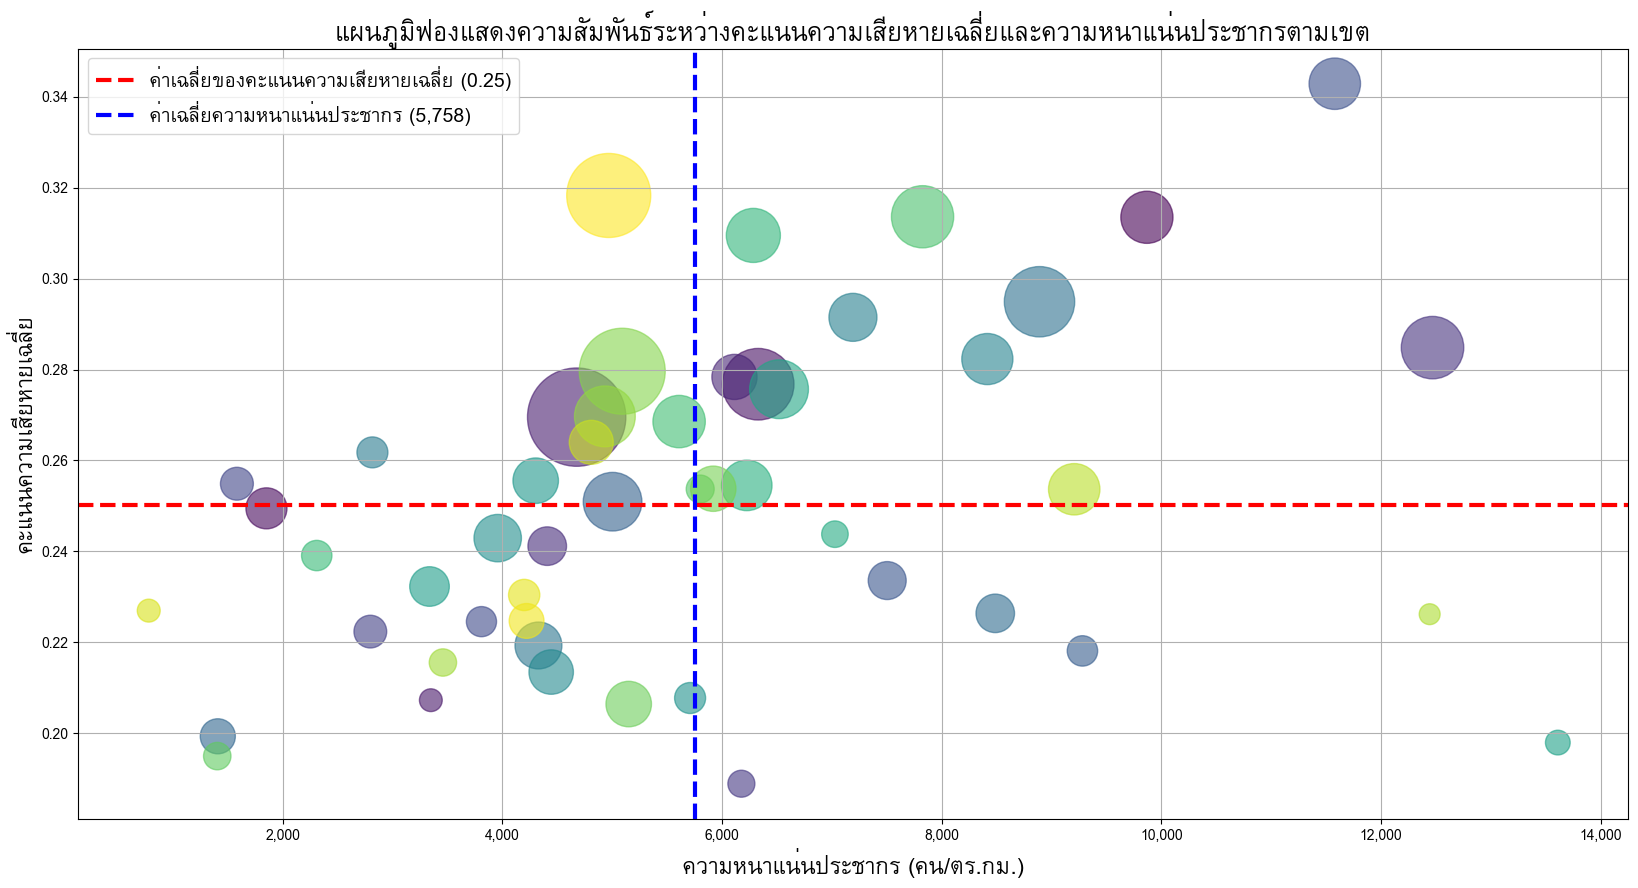

In [94]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.ticker as mticker


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
thai_fonts = [font for font in font_list if 'thai' in font.lower() or 'garuda' in font.lower()]

print("Available Thai or Garuda fonts:")
for font in thai_fonts:
    print(font)

garuda_font_path_fallback = None
if thai_fonts:
    garuda_font_path_fallback = thai_fonts[0]
if garuda_font_path_fallback:
    try:
        fm.fontManager.addfont(garuda_font_path_fallback)
        plt.rcParams['font.family'] = 'Garuda' # Still try to use 'Garuda' as the family name if it was added
        plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS'] # Add fallback fonts
        print(f"ตั้งค่าฟอนต์โดยใช้ path {garuda_font_path_fallback} เรียบร้อยแล้ว")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์ด้วย path {garuda_font_path_fallback}: {e}")
else:
    print("ไม่พบฟอนต์ไทยที่เหมาะสมในระบบ ลองติดตั้งฟอนต์เพิ่มเติมหากจำเป็น")


damage_stats_merged = average_damage_score_by_district.merge(
    sum_damage_score_by_district, on='DISTRICT'
)

district_pop_area = merged_df.groupby('DISTRICT')['pop_area_km'].mean().reset_index()

final_merged_df = damage_stats_merged.merge(
    district_pop_area, on='DISTRICT'
)


filtered_merged_df = merged_df[merged_df['total_dmg_score'] > 0].copy()

average_damage_score_by_district_filtered = filtered_merged_df.groupby('DISTRICT')['total_dmg_score'].mean().reset_index()
average_damage_score_by_district_filtered = average_damage_score_by_district_filtered.rename(columns={'total_dmg_score': 'average_total_dmg_score'})

sum_damage_score_by_district_filtered = filtered_merged_df.groupby('DISTRICT')['total_dmg_score'].sum().reset_index()
sum_damage_score_by_district_filtered = sum_damage_score_by_district_filtered.rename(columns={'total_dmg_score': 'sum_total_dmg_score'})

damage_stats_merged_filtered = average_damage_score_by_district_filtered.merge(
    sum_damage_score_by_district_filtered, on='DISTRICT'
)

final_merged_df_filtered = damage_stats_merged_filtered.merge(
    district_pop_area, on='DISTRICT'
)

mean_average_total_dmg_score_filtered = final_merged_df_filtered['average_total_dmg_score'].mean()
mean_pop_area_km_filtered = final_merged_df_filtered['pop_area_km'].mean()


size_scale = 100
scaled_sum_total_dmg_score_filtered = final_merged_df_filtered['sum_total_dmg_score'] * size_scale

plt.figure(figsize=(20, 10))

# Create the scatter plot using the filtered data
ax = plt.scatter( # Assign the scatter plot to an axes object
    final_merged_df_filtered['pop_area_km'],
    final_merged_df_filtered['average_total_dmg_score'],
    s=scaled_sum_total_dmg_score_filtered,
    alpha=0.6, # Transparency
    c=np.arange(len(final_merged_df_filtered)),
    cmap='viridis'
)

# Add dashed lines for mean values based on the filtered data
plt.axhline(mean_average_total_dmg_score_filtered, color='red', linestyle='--', label=f'ค่าเฉลี่ยของคะแนนความเสียหายเฉลี่ย ({mean_average_total_dmg_score_filtered:,.2f})',linewidth=3)
plt.axvline(mean_pop_area_km_filtered, color='blue', linestyle='--', label=f'ค่าเฉลี่ยความหนาแน่นประชากร ({mean_pop_area_km_filtered:,.0f})',linewidth=3)

plt.xlabel('ความหนาแน่นประชากร (คน/ตร.กม.)', fontsize=16)
plt.ylabel('คะแนนความเสียหายเฉลี่ย', fontsize=16)
plt.title('แผนภูมิฟองแสดงความสัมพันธ์ระหว่างคะแนนความเสียหายเฉลี่ยและความหนาแน่นประชากรตามเขต', fontsize=18)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(fontsize=14)

plt.grid(True)
plt.show()

In [75]:
specified_districts = ['บางรัก', 'วัฒนา', 'คลองสาน', 'ราชเทวี', 'คลองเตย', 'ปทุมวัน', 'พญาไท', 'ธนบุรี', 'ดินแดง', 'ห้วยขวาง', 'ยานนาวา', 'สัมพันธวงศ์', 'จตุจักร', 'บางซื่อ']

filtered_districts_df = merged_df[merged_df['DISTRICT'].isin(specified_districts)].copy()

filtered_districts_df = filtered_districts_df[filtered_districts_df['total_dmg_score'] > 0].copy()

display(filtered_districts_df.head())

,ปีเดือน,รหัสจังหวัด,ชื่อจังหวัด,รหัสสำนักทะเบียน,ชื่อสำนักทะเบียน,รหัสตำบล,ชื่อตำบล,รหัสหมู่บ้าน,ชื่อหมู่บ้าน,pop,...,SoftClay_m,WaterConte,LiquidLimi,Plasticity,Total_Unit,Score_Rang,Zoning,total_dmg_score,total_dmg_class,total_dmg_class_id
152,6807,10,กรุงเทพมหานคร,1004,บางรัก,0,-,0,-,33718,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.352736,ปานกลาง,3
153,6807,10,กรุงเทพมหานคร,1004,บางรัก,0,-,0,-,33718,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.237281,น้อย,2
154,6807,10,กรุงเทพมหานคร,1004,บางรัก,0,-,0,-,33718,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.409983,ปานกลาง,3
157,6807,10,กรุงเทพมหานคร,1004,บางรัก,0,-,0,-,33718,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.297055,น้อย,2
159,6807,10,กรุงเทพมหานคร,1004,บางรัก,0,-,0,-,33718,...,10-14,60-80,60-80,30-50,1.55-1.65,3.3-4.2,A,0.207248,น้อย,2


In [76]:
average_damage_score_by_district_filtered = filtered_districts_df.groupby('DISTRICT')['total_dmg_score'].mean().reset_index()
average_damage_score_by_district_filtered = average_damage_score_by_district_filtered.rename(columns={'total_dmg_score': 'average_total_dmg_score'})
display(average_damage_score_by_district_filtered.head())

,DISTRICT,average_total_dmg_score
0,คลองสาน,0.313502
1,คลองเตย,0.276769
2,จตุจักร,0.269529
3,ดินแดง,0.284823
4,ธนบุรี,0.342887


In [77]:
sum_damage_score_by_district_filtered = filtered_districts_df.groupby('DISTRICT')['total_dmg_score'].sum().reset_index()
sum_damage_score_by_district_filtered = sum_damage_score_by_district_filtered.rename(columns={'total_dmg_score': 'sum_total_dmg_score'})
display(sum_damage_score_by_district_filtered.head())

,DISTRICT,sum_total_dmg_score
0,คลองสาน,14.107580
1,คลองเตย,26.569863
2,จตุจักร,50.132402
3,ดินแดง,20.222405
4,ธนบุรี,13.715472


Available Thai or Garuda fonts:
/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf
ตั้งค่าฟอนต์โดยใช้ path /usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf เรียบร้อยแล้ว


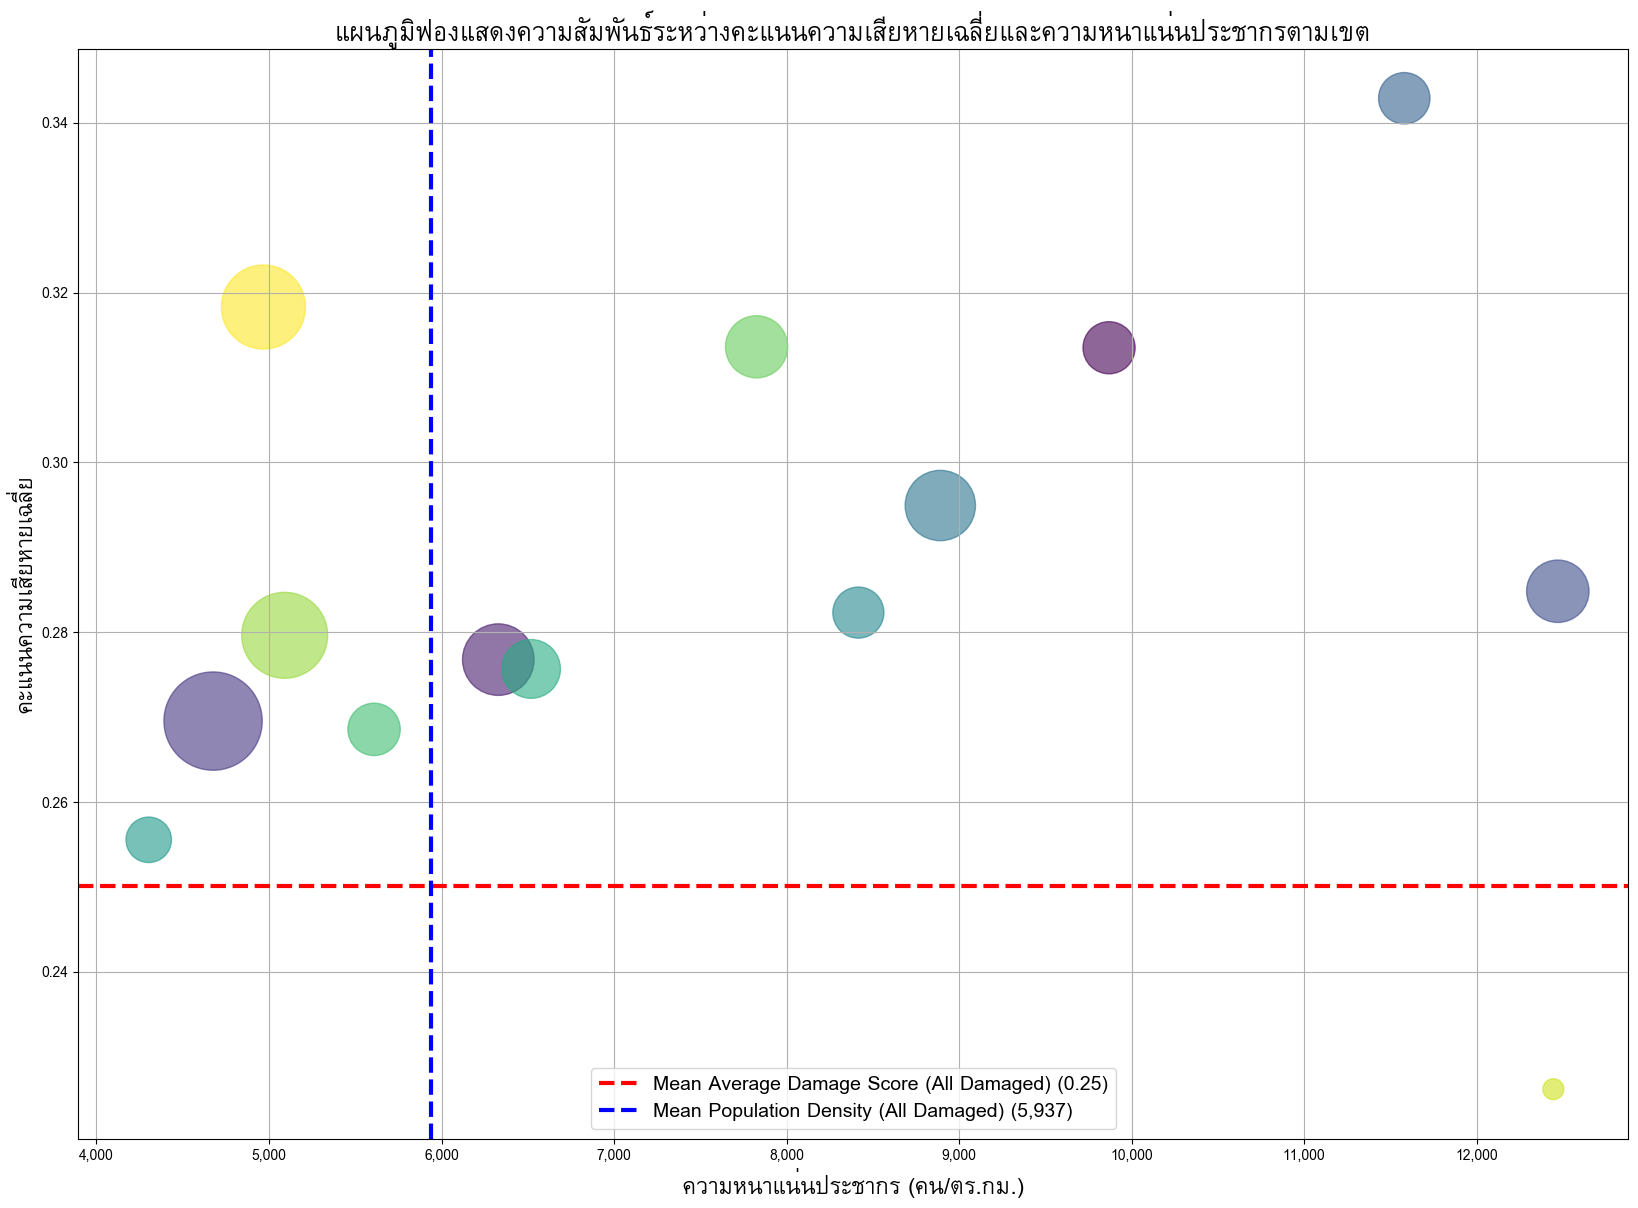

In [98]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.ticker as mticker

# List available fonts to find a Thai font
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
thai_fonts = [font for font in font_list if 'thai' in font.lower() or 'garuda' in font.lower()]

print("Available Thai or Garuda fonts:")
for font in thai_fonts:
    print(font)

garuda_font_path_fallback = None
if thai_fonts:
    garuda_font_path_fallback = thai_fonts[0] # Use the first found Thai font as a fallback

if garuda_font_path_fallback:
    try:
        fm.fontManager.addfont(garuda_font_path_fallback)
        plt.rcParams['font.family'] = 'Garuda' # Still try to use 'Garuda' as the family name if it was added
        plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS'] # Add fallback fonts
        print(f"ตั้งค่าฟอนต์โดยใช้ path {garuda_font_path_fallback} เรียบร้อยแล้ว")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์ด้วย path {garuda_font_path_fallback}: {e}")
else:
    print("ไม่พบฟอนต์ไทยที่เหมาะสมในระบบ ลองติดตั้งฟอนต์เพิ่มเติมหากจำเป็น")


damage_stats_merged = average_damage_score_by_district.merge(
    sum_damage_score_by_district, on='DISTRICT'
)


district_pop_area = merged_df.groupby('DISTRICT')['pop_area_km'].mean().reset_index()

final_merged_df = damage_stats_merged.merge(
    district_pop_area, on='DISTRICT'
)


filtered_merged_df = merged_df[merged_df['total_dmg_score'] > 0].copy()

specified_districts = ['บางรัก', 'วัฒนา', 'คลองสาน', 'ราชเทวี', 'คลองเตย', 'ปทุมวัน', 'พญาไท', 'ธนบุรี', 'ดินแดง', 'ห้วยขวาง', 'ยานนาวา', 'สัมพันธวงศ์', 'จตุจักร', 'บางซื่อ']
filtered_districts_df = filtered_merged_df[filtered_merged_df['DISTRICT'].isin(specified_districts)].copy()


average_damage_score_by_district_filtered_plot = filtered_districts_df.groupby('DISTRICT')['total_dmg_score'].mean().reset_index()
average_damage_score_by_district_filtered_plot = average_damage_score_by_district_filtered_plot.rename(columns={'total_dmg_score': 'average_total_dmg_score'})

sum_damage_score_by_district_filtered_plot = filtered_districts_df.groupby('DISTRICT')['total_dmg_score'].sum().reset_index()
sum_damage_score_by_district_filtered_plot = sum_damage_score_by_district_filtered_plot.rename(columns={'total_dmg_score': 'sum_total_dmg_score'})


damage_stats_merged_filtered_plot = average_damage_score_by_district_filtered_plot.merge(
    sum_damage_score_by_district_filtered_plot, on='DISTRICT'
)

final_merged_df_filtered_plot = damage_stats_merged_filtered_plot.merge(
    district_pop_area, on='DISTRICT'
)


mean_average_total_dmg_score_all_filtered = filtered_merged_df.groupby('DISTRICT')['total_dmg_score'].mean().mean()
mean_pop_area_km_all_filtered = filtered_merged_df['pop_area_km'].mean()


size_scale = 100
scaled_sum_total_dmg_score_filtered_plot = final_merged_df_filtered_plot['sum_total_dmg_score'] * size_scale

plt.figure(figsize=(20, 10))

# Create the scatter plot using the filtered data for plotting
ax = plt.scatter( # Assign the scatter plot to an axes object
    final_merged_df_filtered_plot['pop_area_km'],
    final_merged_df_filtered_plot['average_total_dmg_score'],
    s=scaled_sum_total_dmg_score_filtered_plot, # Bubble size
    alpha=0.6, # Transparency
    c=np.arange(len(final_merged_df_filtered_plot)), # Assign a color based on index for variety
    cmap='viridis' # Colormap for colors
)

# Add dashed lines for mean values based on ALL filtered data
plt.axhline(mean_average_total_dmg_score_all_filtered, color='red', linestyle='--', label=f'Mean Average Damage Score (All Damaged) ({mean_average_total_dmg_score_all_filtered:,.2f})',linewidth=3)
plt.axvline(mean_pop_area_km_all_filtered, color='blue', linestyle='--', label=f'Mean Population Density (All Damaged) ({mean_pop_area_km_all_filtered:,.0f})',linewidth=3)


plt.xlabel('ความหนาแน่นประชากร (คน/ตร.กม.)', fontsize=16)
plt.ylabel('คะแนนความเสียหายเฉลี่ย', fontsize=16)
plt.title('แผนภูมิฟองแสดงความสัมพันธ์ระหว่างคะแนนความเสียหายเฉลี่ยและความหนาแน่นประชากรตามเขต', fontsize=18)


plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(fontsize=14)
plt.subplots_adjust(top=1.2)
plt.grid(True)
plt.show()

In [100]:
from IPython.display import HTML
import pandas as pd

specified_districts = ['บางรัก', 'วัฒนา', 'คลองสาน', 'ราชเทวี', 'คลองเตย', 'ปทุมวัน', 'พญาไท', 'ธนบุรี', 'ดินแดง', 'ห้วยขวาง', 'ยานนาวา', 'สัมพันธวงศ์', 'จตุจักร', 'บางซื่อ']
filtered_pop_df = merged_df[merged_df['DISTRICT'].isin(specified_districts)].copy()

district_vulnerable_pop = filtered_pop_df[['DISTRICT', '%mix_กลุ่มเปราะบาง']].drop_duplicates().reset_index(drop=True)
district_vulnerable_pop = district_vulnerable_pop.rename(columns={'DISTRICT': 'เขต', '%mix_กลุ่มเปราะบาง': 'สัดส่วนกลุ่มเปราะบาง'})
district_vulnerable_pop['สัดส่วนกลุ่มเปราะบาง'] = district_vulnerable_pop['สัดส่วนกลุ่มเปราะบาง'].str.replace('%', '').astype(float)
district_vulnerable_pop_sorted = district_vulnerable_pop.sort_values(by='สัดส่วนกลุ่มเปราะบาง', ascending=False)
styled_table = district_vulnerable_pop_sorted.style.background_gradient(subset=['สัดส่วนกลุ่มเปราะบาง'], cmap='Purples') \
    .format({'สัดส่วนกลุ่มเปราะบาง': '{:.2f}%'}) \
    .set_properties(**{'font-size': '14pt', 'border-collapse': 'collapse', 'width': '200px', 'padding': '10px'}) \
    .set_properties(subset=['เขต'], **{'text-align': 'right'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '16pt'), ('text-align', 'right')]}, ])

display(HTML(styled_table.to_html(index=False)))

,เขต,สัดส่วนกลุ่มเปราะบาง
3,สัมพันธวงศ์,41.64%
0,บางรัก,38.18%
7,คลองสาน,37.13%
13,วัฒนา,36.82%
9,บางซื่อ,35.81%
2,ยานนาวา,35.45%
1,ปทุมวัน,34.90%
8,ดินแดง,34.86%
5,ธนบุรี,34.72%
12,ราชเทวี,33.96%


Available Thai or Garuda fonts:
/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf
ตั้งค่าฟอนต์โดยใช้ path /usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf เรียบร้อยแล้ว


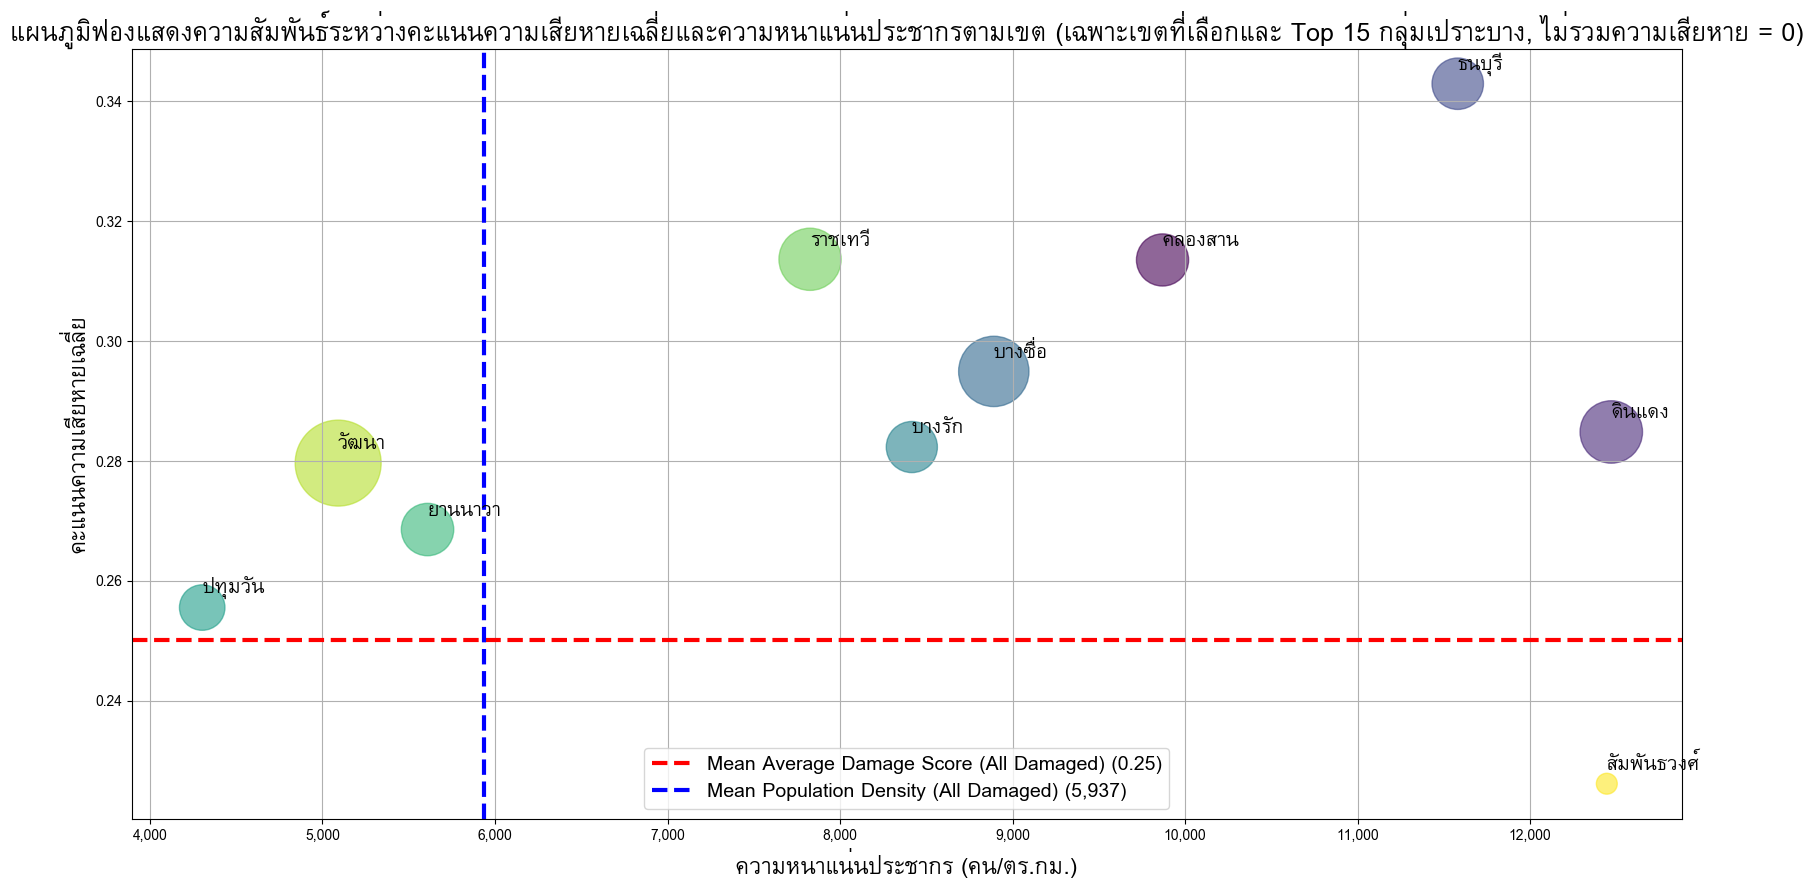

In [101]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.ticker as mticker # Import ticker for formatting

# List available fonts to find a Thai font
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
thai_fonts = [font for font in font_list if 'thai' in font.lower() or 'garuda' in font.lower()]

print("Available Thai or Garuda fonts:")
for font in thai_fonts:
    print(font)

# Assuming a suitable font is found, try setting it again
# Replace with a font path found in the output if '/usr/share/fonts/truetype/tlwg/Garuda.ttf' is not correct
garuda_font_path_fallback = None
if thai_fonts:
    garuda_font_path_fallback = thai_fonts[0] # Use the first found Thai font as a fallback

if garuda_font_path_fallback:
    try:
        fm.fontManager.addfont(garuda_font_path_fallback)
        plt.rcParams['font.family'] = 'Garuda' # Still try to use 'Garuda' as the family name if it was added
        plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS'] # Add fallback fonts
        print(f"ตั้งค่าฟอนต์โดยใช้ path {garuda_font_path_fallback} เรียบร้อยแล้ว")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์ด้วย path {garuda_font_path_fallback}: {e}")
else:
    print("ไม่พบฟอนต์ไทยที่เหมาะสมในระบบ ลองติดตั้งฟอนต์เพิ่มเติมหากจำเป็น")


damage_stats_merged = average_damage_score_by_district.merge(
    sum_damage_score_by_district, on='DISTRICT'
)

district_pop_area = merged_df.groupby('DISTRICT')['pop_area_km'].mean().reset_index()

final_merged_df = damage_stats_merged.merge(
    district_pop_area, on='DISTRICT'
)

filtered_merged_df = merged_df[merged_df['total_dmg_score'] > 0].copy()


specified_districts = ['บางรัก', 'วัฒนา', 'คลองสาน', 'ราชเทวี', 'คลองเตย', 'ปทุมวัน', 'พญาไท', 'ธนบุรี', 'ดินแดง', 'ห้วยขวาง', 'ยานนาวา', 'สัมพันธวงศ์', 'จตุจักร', 'บางซื่อ']
districts_in_top_15_vulnerable = top_15_district_vulnerable_pop['เขต'].tolist()
districts_to_display = [district for district in specified_districts if district in districts_in_top_15_vulnerable]

filtered_districts_for_plot_df = filtered_merged_df[filtered_merged_df['DISTRICT'].isin(districts_to_display)].copy()


average_damage_score_by_district_filtered_plot = filtered_districts_for_plot_df.groupby('DISTRICT')['total_dmg_score'].mean().reset_index()
average_damage_score_by_district_filtered_plot = average_damage_score_by_district_filtered_plot.rename(columns={'total_dmg_score': 'average_total_dmg_score'})

sum_damage_score_by_district_filtered_plot = filtered_districts_for_plot_df.groupby('DISTRICT')['total_dmg_score'].sum().reset_index()
sum_damage_score_by_district_filtered_plot = sum_damage_score_by_district_filtered_plot.rename(columns={'total_dmg_score': 'sum_total_dmg_score'})

damage_stats_merged_filtered_plot = average_damage_score_by_district_filtered_plot.merge(
    sum_damage_score_by_district_filtered_plot, on='DISTRICT'
)

final_merged_df_filtered_plot = damage_stats_merged_filtered_plot.merge(
    district_pop_area, on='DISTRICT'
)

mean_average_total_dmg_score_all_filtered = filtered_merged_df.groupby('DISTRICT')['total_dmg_score'].mean().mean()
mean_pop_area_km_all_filtered = filtered_merged_df['pop_area_km'].mean()


size_scale = 100
scaled_sum_total_dmg_score_filtered_plot = final_merged_df_filtered_plot['sum_total_dmg_score'] * size_scale

plt.figure(figsize=(20, 10))

# Create the scatter plot using the filtered data for plotting
ax = plt.scatter( # Assign the scatter plot to an axes object
    final_merged_df_filtered_plot['pop_area_km'],
    final_merged_df_filtered_plot['average_total_dmg_score'],
    s=scaled_sum_total_dmg_score_filtered_plot, # Bubble size
    alpha=0.6, # Transparency
    c=np.arange(len(final_merged_df_filtered_plot)), # Assign a color based on index for variety
    cmap='viridis' # Colormap for colors
)


for i, row in final_merged_df_filtered_plot.iterrows():
    plt.annotate(row['DISTRICT'], (row['pop_area_km'], row['average_total_dmg_score']), textcoords="offset points", xytext=(0,10), ha='left', fontsize=14)

plt.axhline(mean_average_total_dmg_score_all_filtered, color='red', linestyle='--', label=f'Mean Average Damage Score (All Damaged) ({mean_average_total_dmg_score_all_filtered:,.2f})',linewidth=3) # Added comma formatting
plt.axvline(mean_pop_area_km_all_filtered, color='blue', linestyle='--', label=f'Mean Population Density (All Damaged) ({mean_pop_area_km_all_filtered:,.0f})',linewidth=3) # Added comma formatting

plt.xlabel('ความหนาแน่นประชากร (คน/ตร.กม.)', fontsize=16)
plt.ylabel('คะแนนความเสียหายเฉลี่ย', fontsize=16)
plt.title('แผนภูมิฟองแสดงความสัมพันธ์ระหว่างคะแนนความเสียหายเฉลี่ยและความหนาแน่นประชากรตามเขต (เฉพาะเขตที่เลือกและ Top 15 กลุ่มเปราะบาง, ไม่รวมความเสียหาย = 0)', fontsize=18)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(fontsize=14)

plt.grid(True)
plt.show()

In [102]:
from IPython.display import HTML
import pandas as pd


merged_df['%mix_กลุ่มเปราะบาง_numeric'] = merged_df['%mix_กลุ่มเปราะบาง'].str.replace('%', '').astype(float)
average_vulnerable_pop_all_districts = merged_df['%mix_กลุ่มเปราะบาง_numeric'].mean()

district_vulnerable_pop = merged_df[['DISTRICT', '%mix_กลุ่มเปราะบาง']].drop_duplicates().reset_index(drop=True)
district_vulnerable_pop = district_vulnerable_pop.rename(columns={'DISTRICT': 'เขต', '%mix_กลุ่มเปราะบาง': 'สัดส่วนกลุ่มเปราะบาง'})
district_vulnerable_pop['สัดส่วนกลุ่มเปราะบาง_numeric'] = district_vulnerable_pop['สัดส่วนกลุ่มเปราะบาง'].str.replace('%', '').astype(float)
district_vulnerable_pop_sorted = district_vulnerable_pop.sort_values(by='สัดส่วนกลุ่มเปราะบาง_numeric', ascending=False)

top_15_district_vulnerable_pop = district_vulnerable_pop_sorted.head(23).copy()

styled_table = top_15_district_vulnerable_pop.style.background_gradient(subset=['สัดส่วนกลุ่มเปราะบาง_numeric'], cmap='Purples') \
    .format({'สัดส่วนกลุ่มเปราะบาง_numeric': '{:.2f}%'}) \
    .set_properties(**{'font-size': '14pt', 'border-collapse': 'collapse', 'width': '200px', 'padding': '10px'}) \
    .set_properties(subset=['เขต'], **{'text-align': 'right'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '16pt'), ('text-align', 'right')]},
    ])

display(HTML(styled_table.to_html(index=False, exclude=['สัดส่วนกลุ่มเปราะบาง_numeric'])))

,เขต,สัดส่วนกลุ่มเปราะบาง,สัดส่วนกลุ่มเปราะบาง_numeric
7,ป้อมปราบศัตรูพ่าย,41.92%,41.92%
12,สัมพันธวงศ์,41.64%,41.64%
0,พระนคร,40.74%,40.74%
1,ดุสิต,39.32%,39.32%
19,บางกอกน้อย,38.42%,38.42%
3,บางรัก,38.18%,38.18%
27,สาทร,38.03%,38.03%
30,บางคอแหลม,37.27%,37.27%
17,คลองสาน,37.13%,37.13%
38,วัฒนา,36.82%,36.82%


ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว


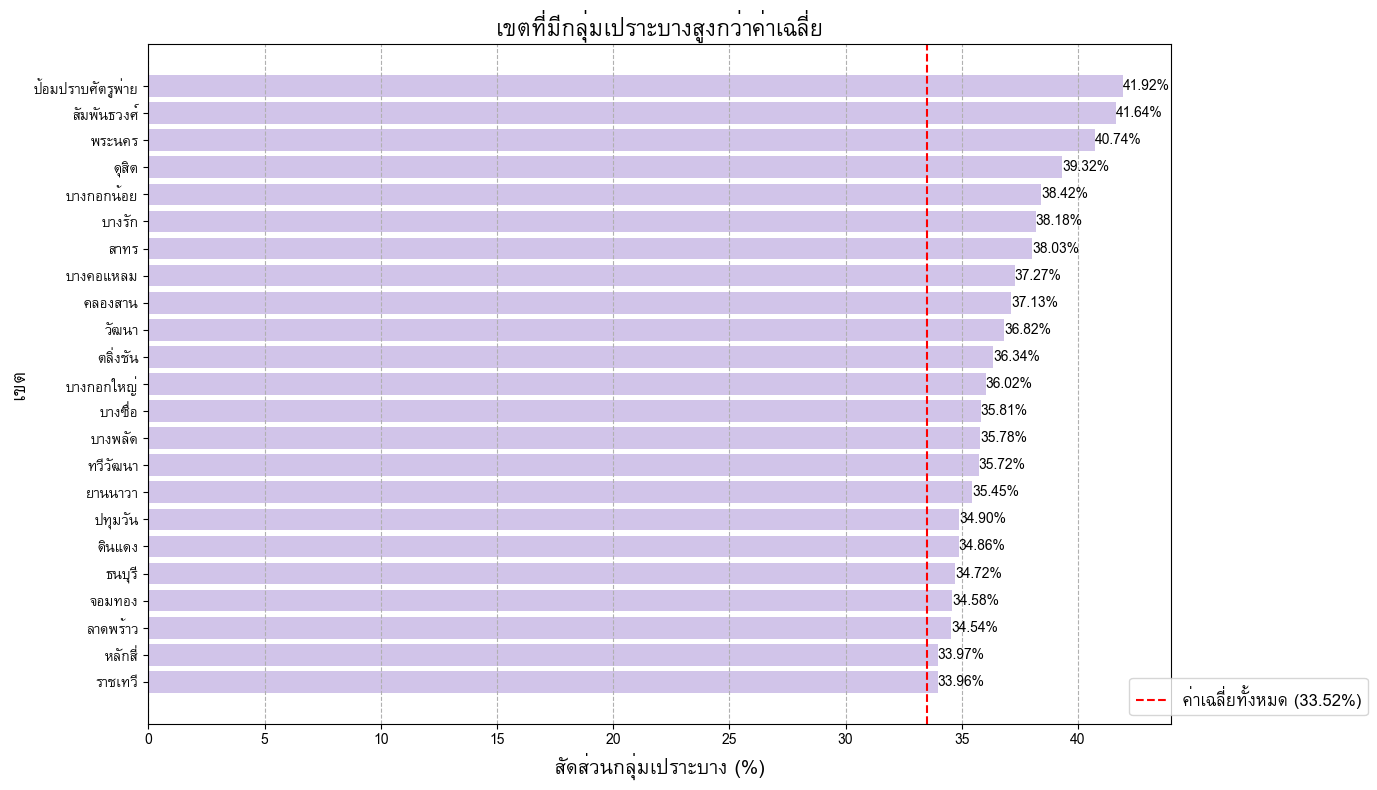

In [97]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add the specific font file to the font manager (assuming Garuda font is already installed and path is correct)
garuda_font_path = '/usr/share/fonts/truetype/tlwg/Garuda.ttf'
try:
    fm.fontManager.addfont(garuda_font_path)
    plt.rcParams['font.family'] = 'Garuda'
    plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS']
    print(f"ตั้งค่าฟอนต์ Garuda โดยใช้ path เรียบร้อยแล้ว")
except FileNotFoundError:
    print(f"Error: ไม่พบไฟล์ฟอนต์ที่ตำแหน่ง {garuda_font_path}. โปรดตรวจสอบ path ของฟอนต์ที่ติดตั้ง.")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์: {e}")

plt.figure(figsize=(14, 8))
plt.barh(top_15_district_vulnerable_pop['เขต'], top_15_district_vulnerable_pop['สัดส่วนกลุ่มเปราะบาง_numeric'], color='#d1c4e9') # Pastel purple color

plt.xlabel('สัดส่วนกลุ่มเปราะบาง (%)', fontsize=14)
plt.ylabel('เขต', fontsize=14)
plt.title('เขตที่มีกลุ่มเปราะบางสูงกว่าค่าเฉลี่ย', fontsize=16)
plt.gca().invert_yaxis()


for index, value in enumerate(top_15_district_vulnerable_pop['สัดส่วนกลุ่มเปราะบาง_numeric']):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.axvline(average_vulnerable_pop_all_districts, color='red', linestyle='--', label=f'ค่าเฉลี่ยทั้งหมด ({average_vulnerable_pop_all_districts:.2f}%)')
plt.grid(axis='x', linestyle='--')
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0), fontsize=12)
plt.tight_layout()
plt.show()

Available Thai or Garuda fonts:
/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf
/usr/share/fonts/truetype/tlwg/Garuda.ttf
/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf
ตั้งค่าฟอนต์โดยใช้ path /usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf เรียบร้อยแล้ว


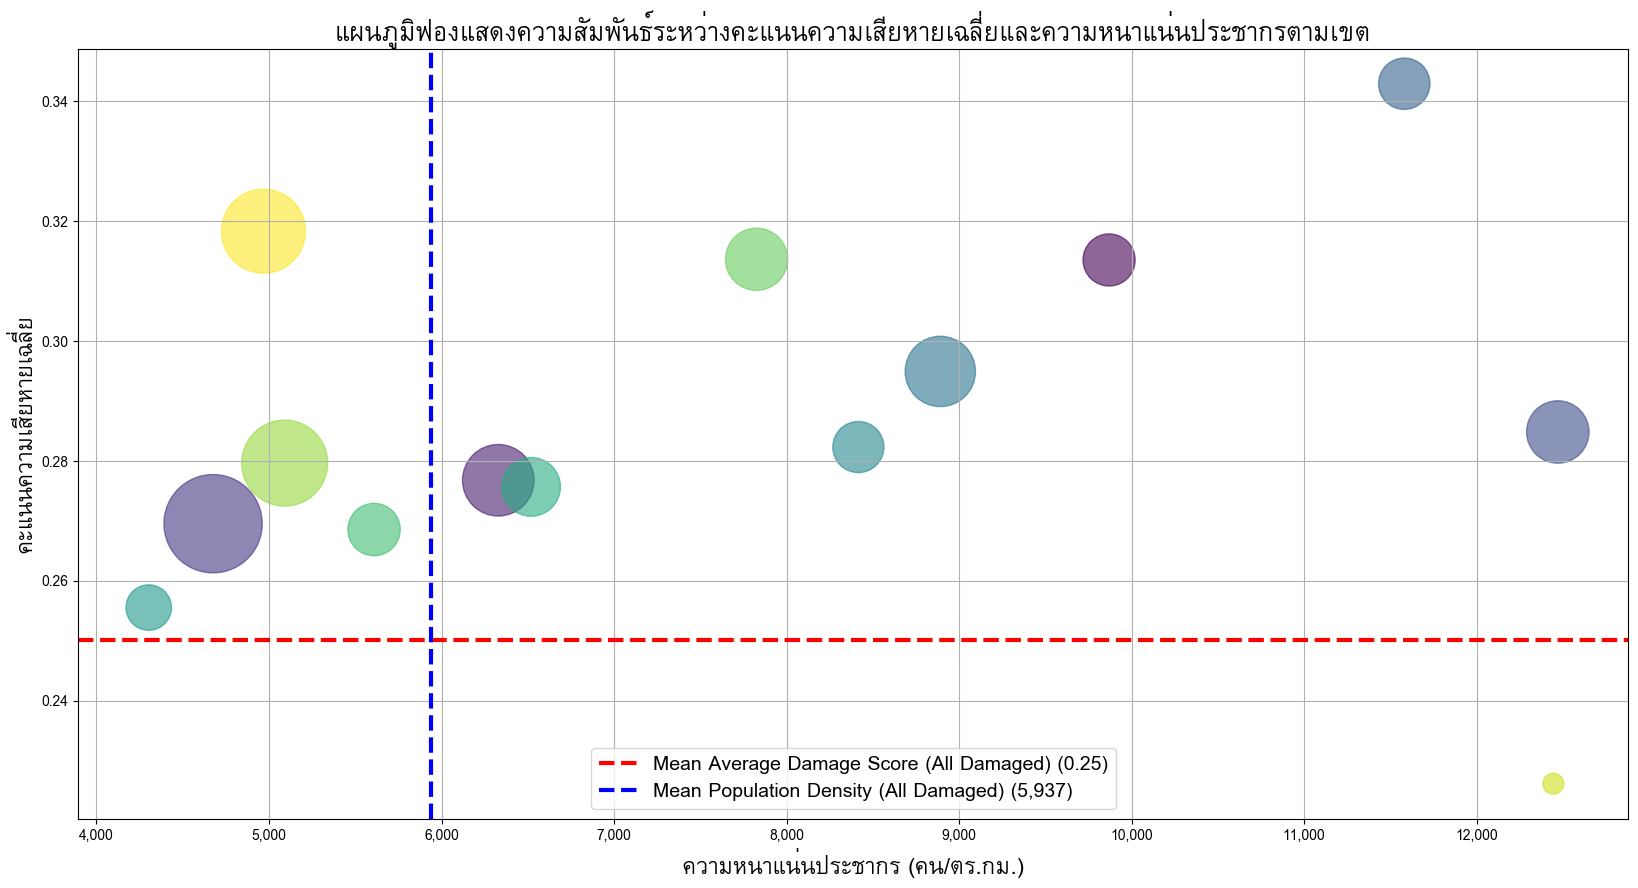

In [96]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import matplotlib.ticker as mticker # Import ticker for formatting

# List available fonts to find a Thai font
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
thai_fonts = [font for font in font_list if 'thai' in font.lower() or 'garuda' in font.lower()]

print("Available Thai or Garuda fonts:")
for font in thai_fonts:
    print(font)

# Assuming a suitable font is found, try setting it again
# Replace with a font path found in the output if '/usr/share/fonts/truetype/tlwg/Garuda.ttf' is not correct
garuda_font_path_fallback = None
if thai_fonts:
    garuda_font_path_fallback = thai_fonts[0] # Use the first found Thai font as a fallback

if garuda_font_path_fallback:
    try:
        fm.fontManager.addfont(garuda_font_path_fallback)
        plt.rcParams['font.family'] = 'Garuda' # Still try to use 'Garuda' as the family name if it was added
        plt.rcParams['font.sans-serif'] = ['Garuda', 'DejaVu Sans', 'Arial Unicode MS'] # Add fallback fonts
        print(f"ตั้งค่าฟอนต์โดยใช้ path {garuda_font_path_fallback} เรียบร้อยแล้ว")
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการตั้งค่าฟอนต์ด้วย path {garuda_font_path_fallback}: {e}")
else:
    print("ไม่พบฟอนต์ไทยที่เหมาะสมในระบบ ลองติดตั้งฟอนต์เพิ่มเติมหากจำเป็น")


damage_stats_merged = average_damage_score_by_district.merge(
    sum_damage_score_by_district, on='DISTRICT'
)


district_pop_area = merged_df.groupby('DISTRICT')['pop_area_km'].mean().reset_index()

final_merged_df = damage_stats_merged.merge(
    district_pop_area, on='DISTRICT'
)

filtered_merged_df = merged_df[merged_df['total_dmg_score'] > 0].copy()

specified_districts = ['บางรัก', 'วัฒนา', 'คลองสาน', 'ราชเทวี', 'คลองเตย', 'ปทุมวัน', 'พญาไท', 'ธนบุรี', 'ดินแดง', 'ห้วยขวาง', 'ยานนาวา', 'สัมพันธวงศ์', 'จตุจักร', 'บางซื่อ']
filtered_districts_df = filtered_merged_df[filtered_merged_df['DISTRICT'].isin(specified_districts)].copy()


average_damage_score_by_district_filtered_plot = filtered_districts_df.groupby('DISTRICT')['total_dmg_score'].mean().reset_index()
average_damage_score_by_district_filtered_plot = average_damage_score_by_district_filtered_plot.rename(columns={'total_dmg_score': 'average_total_dmg_score'})

sum_damage_score_by_district_filtered_plot = filtered_districts_df.groupby('DISTRICT')['total_dmg_score'].sum().reset_index()
sum_damage_score_by_district_filtered_plot = sum_damage_score_by_district_filtered_plot.rename(columns={'total_dmg_score': 'sum_total_dmg_score'})


damage_stats_merged_filtered_plot = average_damage_score_by_district_filtered_plot.merge(
    sum_damage_score_by_district_filtered_plot, on='DISTRICT'
)

final_merged_df_filtered_plot = damage_stats_merged_filtered_plot.merge(
    district_pop_area, on='DISTRICT'
)


mean_average_total_dmg_score_all_filtered = filtered_merged_df.groupby('DISTRICT')['total_dmg_score'].mean().mean()
mean_pop_area_km_all_filtered = filtered_merged_df['pop_area_km'].mean()


size_scale = 100
scaled_sum_total_dmg_score_filtered_plot = final_merged_df_filtered_plot['sum_total_dmg_score'] * size_scale

plt.figure(figsize=(20, 10))

# Create the scatter plot using the filtered data for plotting
ax = plt.scatter( # Assign the scatter plot to an axes object
    final_merged_df_filtered_plot['pop_area_km'],
    final_merged_df_filtered_plot['average_total_dmg_score'],
    s=scaled_sum_total_dmg_score_filtered_plot, # Bubble size
    alpha=0.6, # Transparency
    c=np.arange(len(final_merged_df_filtered_plot)),
    cmap='viridis' # Colormap for colors
)

plt.axhline(mean_average_total_dmg_score_all_filtered, color='red', linestyle='--', label=f'Mean Average Damage Score (All Damaged) ({mean_average_total_dmg_score_all_filtered:,.2f})',linewidth=3) # Added comma formatting
plt.axvline(mean_pop_area_km_all_filtered, color='blue', linestyle='--', label=f'Mean Population Density (All Damaged) ({mean_pop_area_km_all_filtered:,.0f})',linewidth=3) # Added comma formatting


plt.xlabel('ความหนาแน่นประชากร (คน/ตร.กม.)', fontsize=16)
plt.ylabel('คะแนนความเสียหายเฉลี่ย', fontsize=16)
plt.title('แผนภูมิฟองแสดงความสัมพันธ์ระหว่างคะแนนความเสียหายเฉลี่ยและความหนาแน่นประชากรตามเขต', fontsize=18)


plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(fontsize=14)

plt.grid(True)
plt.show()